# Assignment

### Team 11 : Vanessa Mae and Dominique Leong
The independent variable is the `floor_area_sqm`
The dependent variable is the `resale_price`

The primary objective of this analysis is to examine the relationship between floor area and resale price of HDB flats in Singapore. Specifically, the analysis seeks to determine whether larger flats command higher resale prices, and to quantify how much resale price changes with an increase in floor area.

Link to the data "https://data.gov.sg/datasets?agencies=Housing+%26+Development+Board+(HDB)&resultId=189"

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [60]:
data = pd.read_csv('resale_price.csv')
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.000,Improved,1979,61 years 04 months,"232,000.000"
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.000,New Generation,1978,60 years 07 months,"250,000.000"
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.000,New Generation,1980,62 years 05 months,"262,000.000"
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.000,New Generation,1980,62 years 01 month,"265,000.000"
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.000,New Generation,1980,62 years 05 months,"265,000.000"
...,...,...,...,...,...,...,...,...,...,...,...
222593,2026-01,YISHUN,4 ROOM,504B,YISHUN ST 51,04 TO 06,93.000,Model A,2016,89 years 03 months,"585,000.000"
222594,2026-01,YISHUN,4 ROOM,754,YISHUN ST 72,10 TO 12,84.000,Simplified,1985,58 years 09 months,"490,000.000"
222595,2026-01,YISHUN,5 ROOM,419,YISHUN AVE 11,07 TO 09,122.000,Improved,1993,66 years 02 months,"715,000.000"
222596,2026-01,YISHUN,5 ROOM,318C,YISHUN AVE 9,04 TO 06,112.000,Improved,2015,88 years 10 months,"726,000.000"


In [61]:
print(f"Summary:\n{data.describe().round(2)}")


Summary:
       floor_area_sqm  lease_commence_date  resale_price
count     222,598.000          222,598.000   222,598.000
mean           96.760            1,996.440   524,755.430
std            24.020               14.300   186,731.530
min            31.000            1,966.000   140,000.000
25%            81.000            1,985.000   385,000.000
50%            93.000            1,997.000   493,000.000
75%           112.000            2,012.000   630,000.000
max           366.700            2,022.000 1,658,888.000


## Histogram

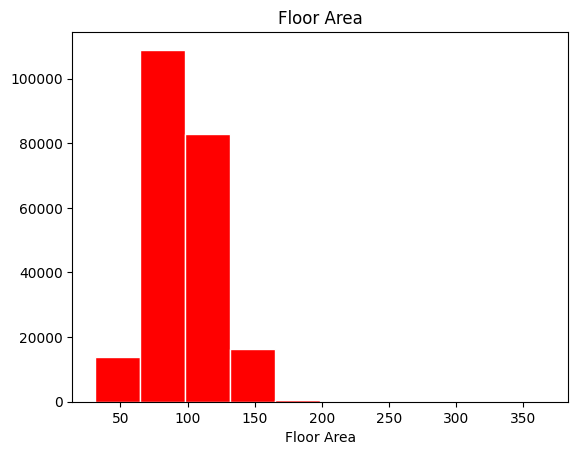

In [62]:
plt.hist(data['floor_area_sqm'], color="red", edgecolor="white")
plt.title("Floor Area")
plt.xlabel("Floor Area")
plt.show()

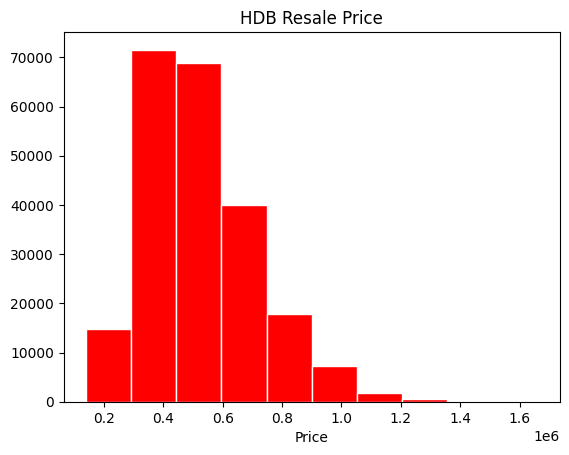

In [63]:
plt.hist(data['resale_price'], color="red", edgecolor="white")
plt.title("HDB Resale Price")
plt.xlabel("Price")
plt.show()

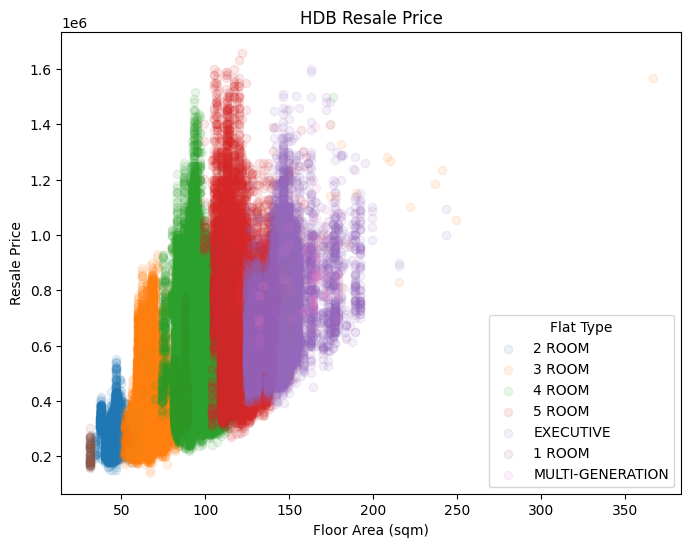

In [64]:
plt.figure(figsize=(8, 6))

for flat in data['flat_type'].unique():
    subset = data[data['flat_type'] == flat]
    plt.scatter(
        subset['floor_area_sqm'],
        subset['resale_price'],
        label=flat,
        alpha=0.1
    )

plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.title("HDB Resale Price")
plt.legend(title='Flat Type')
plt.show()

Text(0.5, 1.0, 'HDB Resale Price')

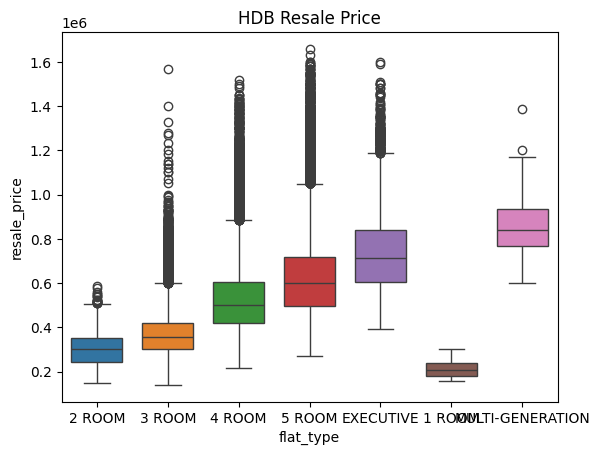

In [77]:
sns.boxplot(x='flat_type',y='resale_price',hue='flat_type', data=data, gap=0.1)
plt.title("HDB Resale Price")

# Regression Model

Relationship of how floor area of a property affects its sale price

Variables

 - Independent Variable: floor_area_sqm
 - Dependent Variable: resale_price

$ E(\varepsilon_i) = 0 $ *(Zero Mean)* 

$ V(\varepsilon_i) = \sigma^2 $
   *(Equal Variance: the variance does not depend on \( i \))*

$ \varepsilon_i $ and $ \varepsilon_j $ are uncorrelated for $ i \neq j $

xbar (floor area) is 96.76261556707608, ybar (resale price) is 524755.4317502403
Sxx = 128409613.1480; Syy = 7761660257924952.0000; Sxy = 570903506964.0839


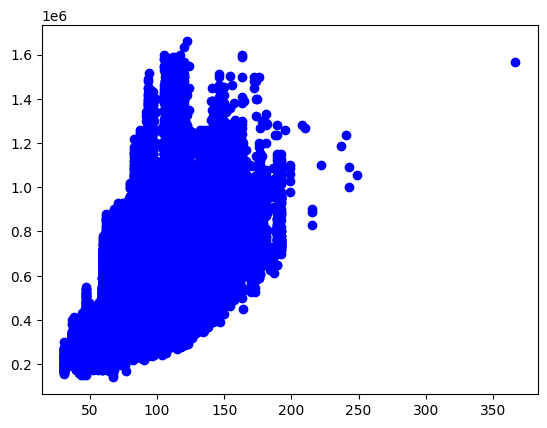

In [66]:
y = data['resale_price']
x = data['floor_area_sqm']
plt.plot(x, y, 'o', color='blue')

xbar = np.mean(x)
ybar = np.mean(y)

print(f"xbar (floor area) is {xbar}, ybar (resale price) is {ybar}")

sxx = np.sum((x - xbar) ** 2)
syy = np.sum((y - ybar) ** 2)
sxy = np.sum((x - xbar) * (y - ybar))

print(f"Sxx = {sxx:.4f}; Syy = {syy:.4f}; Sxy = {sxy:.4f}")

In [67]:
stats_data = np.column_stack((xbar, ybar, sxx, syy, sxy))
SS = pd.DataFrame(stats_data, columns = ['xbar', 'ybar', 'Sxx', 'Syy', 'Sxy'])

pd.options.display.float_format = '{:,.1f}'.format
display(SS)

,xbar,ybar,Sxx,Syy,Sxy
0,96.8,"524,755.4","128,409,613.1","7,761,660,257,924,952.0","570,903,506,964.1"


In [68]:
beta1hat = sxy / sxx
beta0hat = ybar - beta1hat * xbar
data = np.column_stack((beta0hat, beta1hat))
coef = pd.DataFrame(data, columns = ['beta0hat','beta1hat'])
pd.options.display.float_format = '{:,.4f}'.format
display(coef)
print(f'the equation of the fitted linear regression model is y={beta0hat:.3}+{beta1hat:.3}x.')

,beta0hat,beta1hat
0,"94,553.0877","4,445.9561"


the equation of the fitted linear regression model is y=9.46e+04+4.45e+03x.


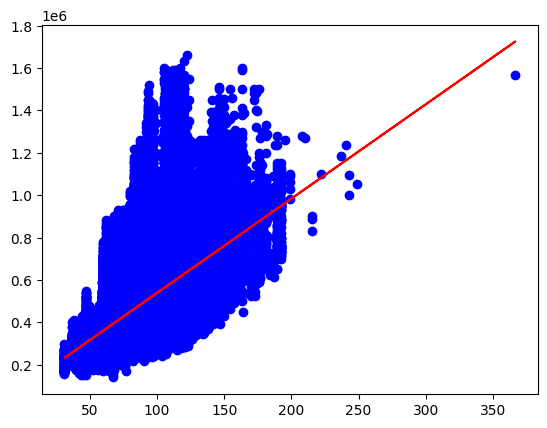

In [69]:
yhat = beta0hat + (beta1hat * x)
residual_e = y - yhat

## This is how to add the regression line on the plot
plt.scatter(x, y, color= 'blue')
plt.plot(x, yhat, color= 'red')
plt.show()

### ANOVA Table

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

data = pd.read_csv('resale_price.csv')
model = ols('resale_price ~ floor_area_sqm', data=data).fit()
anova_table = sm.stats.anova_lm(model, type = 1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
floor_area_sqm,1.0000,"2,538,211,947,483,269.0000","2,538,211,947,483,269.0000","108,165.2949",0.0000
Residual,"222,596.0000","5,223,448,310,441,514.0000","23,466,047,505.0833",NaN,NaN


In [71]:
SST = np.sum((y - ybar) ** 2) # SST = syy, in ANOVA context,
SSR = np.sum((yhat - ybar) ** 2)
SSE = np.sum((y - yhat) ** 2)

data = np.column_stack((SST, SSR, SSE))
pd.options.display.float_format = '{:,.1f}'.format 
SSA = pd.DataFrame(data, columns=['SST', 'SSR', 'SSE'])
SSA

,SST,SSR,SSE
0,"7,761,660,257,924,952.0","2,538,211,947,483,436.0","5,223,448,310,441,516.0"


In [72]:
data = pd.read_csv('resale_price.csv')
n = data.shape[0]
s2 = SSE / (n - 2)
s = np.sqrt(s2)

R2 = SSR / SST
r = sxy / np.sqrt(sxx * syy)

# double check that the r^2 should be equal to R2
print(f"Check that r2 == R2, r2 = {r**2}; R2 = {R2}")
print(f"Check that beta1hat ({beta1hat}) == r * sqrt(syy/sxx) ({r * np.sqrt(syy/sxx)})")

r = sxy / np.sqrt(sxx * syy)
data = np.column_stack((s2, s, R2, r))
pd.options.display.float_format = '{:,.3f}'.format 
summary = pd.DataFrame(data, columns = ['s2', 's', 'R2', 'r'])
display(summary)

Check that r2 == R2, r2 = 0.32701920248207533; R2 = 0.3270192024820752
Check that beta1hat (4445.9561318531505) == r * sqrt(syy/sxx) (4445.956131853151)


,s2,s,R2,r
0,"23,466,047,505.083","153,186.316",0.327,0.572


- Estimated variance of the error term = 
- Coefficient of determination = 0.327
- Pearson correlation coefficient = 0.572

In [73]:
data = pd.read_csv('resale_price.csv')
n = data.shape[0]
k = 1 # the number of predictors in the regression model (Degree of freedom for SSR)
df = n - k - 1 # The degree of freedom for SSE
MSR = SSR / k
MSE = SSE / df
F0 = MSR / MSE
pvalF = (1 - stats.f.cdf(F0, k, df))
print(f"pvalF {pvalF}")
ANOVA = pd.DataFrame({
    'Source': ['SSR', 'SSE', 'SST'],
    'SS': [SSR, SSE, SST],
    'df': [k, df, n - 1],
    'F0': [F0, '',''],
    'p_value': [pvalF, '','']
})
ANOVA

pvalF 1.1102230246251565e-16


,Source,SS,df,F0,p_value
0,SSR,"2,538,211,947,483,436.000",1,"108,165.295",0.000
1,SSE,"5,223,448,310,441,516.000",222596,,
2,SST,"7,761,660,257,924,952.000",222597,,


### Parameter Estimate Table

In [74]:
alpha = 0.05
sebeta0 = s * np.sqrt((1 / n) + ((xbar ** 2) / sxx))
sebeta1 = s / (np.sqrt(sxx))

tbeta0 = beta0hat / sebeta0
tbeta1 = beta1hat / sebeta1
pvalue0 = (1 - stats.t.cdf(abs(tbeta0), df)) * 2
pvalue1 = (1 - stats.t.cdf(abs(tbeta1), df)) * 2

lower_bound_beta0 = beta0hat - stats.t(df = df).ppf(1 - alpha / 2) * sebeta0
upper_bound_beta0 = beta0hat + stats.t(df = df).ppf(1 - alpha / 2) * sebeta0

lower_bound_beta1 = beta1hat - stats.t(df = df).ppf(1 - alpha / 2) * sebeta1
upper_bound_beta1 = beta1hat + stats.t(df = df).ppf(1 - alpha / 2) * sebeta1

parameter_estimate = pd.DataFrame({
    'Parameter': ['Intercept', 'Slope'],
    'Values': [beta0hat, beta1hat],
    's.e': [sebeta0, sebeta1],
    'tvalue': [tbeta0, tbeta1],
    'pvalue': [pvalue0, pvalue1],
    'Lower bounds': [lower_bound_beta0, lower_bound_beta1],
    'Upper bound': [upper_bound_beta0, upper_bound_beta1]
})
parameter_estimate

,Parameter,Values,s.e,tvalue,pvalue,Lower bounds,Upper bound
0,Intercept,"94,553.088","1,347.757",70.156,0.000,"91,911.518","97,194.657"
1,Slope,"4,445.956",13.518,328.885,0.000,"4,419.461","4,472.452"


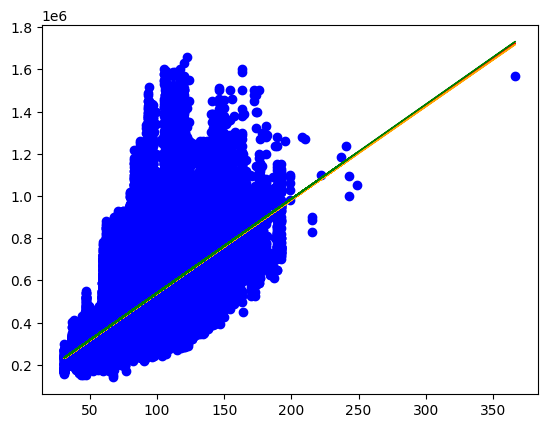

In [75]:
yhat_lower_bound = yhat - stats.t(df = df).ppf(1 - alpha / 2) * (s * np.sqrt(1/n + (x - xbar) ** 2 / sxx))
yhat_upper_bound = yhat + stats.t(df = df).ppf(1 - alpha / 2) * (s * np.sqrt(1/n + (x - xbar) ** 2 / sxx))

plt.scatter(x, y, color='blue')
plt.plot(x, yhat, color = 'red', lw=1)
plt.plot(x, yhat_lower_bound, color='orange', lw=1)
plt.plot(x, yhat_upper_bound, color='green', lw=1)

#### Model Diagnostic

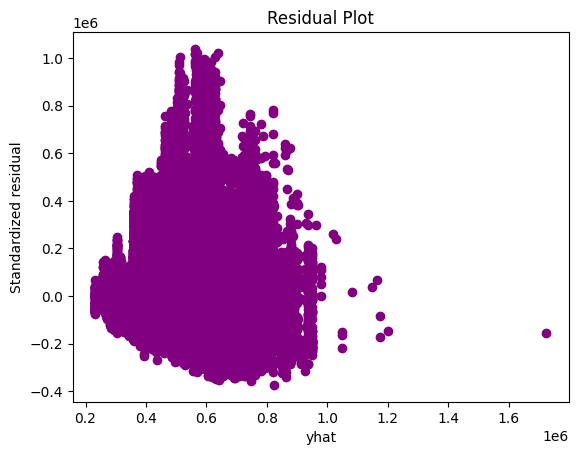

In [76]:
e = y - yhat
r = e / s
plt.scatter(yhat, e, color='purple')
plt.ylabel('Standardized residual')
plt.title('Residual Plot')
plt.xlabel('yhat')
plt.show()

The homoscedasticity assumption is violated.

What the Residual Plot Shows:

- The spread of residuals is much tighter on the left (low fitted values around 0.2-0.4 × 10⁶)
- The spread increases dramatically as fitted values increase (right side around 1.0-1.6 × 10⁶)
- This is the classic "fan shape"

### The Interpretation of the model

Hypothesis Testing
 $$H0: \beta_1 = 0$$
 $$H1: \beta_1 \not= 0$$

Let  
- **Independent variable (x):** floor_area_sqm  
- **Dependent variable (y):** resale_price  

### Null Hypothesis (H₀)
$$ H_0: \beta_1 = 0 $$

There is no linear relationship between floor area and resale price.

### Alternative Hypothesis (H₁)
$$ H_1: \beta_1 \neq 0 $$

There is a linear relationship between floor area and resale price.

## 2. Fitted Regression Model

The estimated linear regression equation is:

$$ 
\hat{y} = 9.46 \times 10^4 + 4.45 \times 10^3 x
$$

or equivalently,

$$
\text{resale price} = 94{,}553.09 + 4{,}445.96(\text{floor_area_sqm})
$$

---

### Interpretation of Coefficients

Slope $ \hat{\beta}_1 = 4{,}445.96 $

For every additional **1 square meter** increase in floor area, the **expected resale price increases by approximately SGD 4,446**, on average, holding other factors constant.

This indicates a **positive relationship** between floor area and resale price.

---

Intercept $(\hat{\beta}_0 = 94{,}553.09) $

The intercept represents the **predicted resale price when the floor area is 0 sqm**.

Since a 0 sqm flat is not realistic, the intercept **does not have a practical interpretation**, but it is required to define the regression line.

---

Hypothesis Test and Model Significance

- Slope p-value: **≈ 0.000**
- F-test p-value:  
  $$
  pval_F = 1.11 \times 10^{-16}
  $$

### Decision
Since the p-value is **much smaller than 0.05**, we **reject the null hypothesis**.

### Conclusion
There is **strong statistical evidence** that `floor_area_sqm` is a **reliable predictor** of `resale_price`.

Interpretation of $ R^2 $

$$
R^2 = 0.327
$$

This means that approximately **32.7% of the variation in HDB resale prices** can be explained by differences in floor area alone.

The remaining **67.3% of the variation** is due to other factors such as location, flat type, remaining lease, storey level, and market conditions.

#### Model Validation Checks

- $ r^2 = R^2 $
- $ \hat{\beta}_1 = r \sqrt{\frac{s_{yy}}{s_{xx}}} $
- Extremely small F-test p-value confirms overall model significance 

These checks confirm that the regression model and manual calculations are consistent and correct.

---

### Overall Summary

The linear regression analysis shows a statistically significant positive relationship between floor area and resale price of HDB flats in Singapore. While floor area is an important determinant of resale price, it explains only about one-third of the total price variation, indicating that other housing and market factors also play a substantial role.